In [1]:
import numpy as np
import pandas as pd

In [2]:
PATH = '/content/drive/MyDrive/Colab Notebooks/traffic forecasting/Project1/traffic forecasting'

In [4]:
train = pd.read_csv(f'{PATH}/data/train.csv')
val = pd.read_csv(f'{PATH}/data/validate.csv')
test = pd.read_csv(f'{PATH}/data/test.csv')

In [13]:
train

,날짜,시간,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200101,0,83247,19128,2611,5161,1588,892,32263,1636,7938,1894,14957,3527,11174,2930,8640,14175,2035,5231,18492,48520,15393,16628,8804,2790,38657,1311,3482,11299,7072,1176,3810,748,3920,2133,3799
1,20200101,1,89309,19027,3337,5502,1650,1043,35609,1644,9896,1967,14682,3420,13884,3062,8349,15654,2417,5483,15283,57904,15834,19785,8483,3381,45759,1162,3849,13180,8771,1283,3763,782,3483,2057,4010
2,20200101,2,66611,14710,2970,4631,1044,921,26821,1104,9343,1838,11120,3587,17141,3255,7025,12520,1859,5058,14327,53876,13866,24501,8167,2670,27425,768,2299,7986,5426,1536,3229,491,2634,1526,3388
3,20200101,3,53290,13753,2270,4242,1021,790,21322,909,10009,1630,9836,3842,20715,2661,7226,9821,1724,4863,12787,51615,13528,28695,9459,2325,18893,632,1716,5703,3156,1104,2882,431,2488,1268,3686
4,20200101,4,52095,17615,2406,3689,1840,922,22711,1354,15497,1264,10668,4559,28308,2894,8201,9038,960,5166,11479,47424,18156,26977,10944,3583,18135,875,2421,5816,2933,1206,2433,499,2952,1927,5608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,20200517,19,311727,101285,10085,30637,10060,8749,148935,6801,26101,9370,74169,17764,34715,19806,42734,63382,14130,34866,71475,96849,79150,25109,14680,10465,128344,6726,15431,25597,14292,9300,22238,3786,16936,10729,20194
3275,20200517,20,305354,91426,8607,26021,8095,7198,136503,6147,20759,8432,68923,14593,30279,17634,37661,57815,13055,31943,65378,92116,72379,23165,11879,9135,131682,5501,15378,24661,14747,8239,20604,3203,15018,9767,17962
3276,20200517,21,306008,75113,6325,19933,5711,4494,129412,5134,14496,6739,54455,11997,27047,15943,29029,54627,12292,27424,60696,83628,57866,16629,8573,6488,127826,4216,12558,22781,14081,6392,17937,2447,12403,7825,14031
3277,20200517,22,237447,49498,4209,12145,3891,2718,96698,3526,9363,4543,35618,7996,19478,10010,18663,39694,8818,17770,45983,57321,35250,10761,5331,4109,94288,2578,8870,16640,11066,4427,11955,1495,7507,5387,8889


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   날짜      3279 non-null   int64
 1   시간      3279 non-null   int64
 2   10      3279 non-null   int64
 3   100     3279 non-null   int64
 4   101     3279 non-null   int64
 5   120     3279 non-null   int64
 6   121     3279 non-null   int64
 7   140     3279 non-null   int64
 8   150     3279 non-null   int64
 9   160     3279 non-null   int64
 10  200     3279 non-null   int64
 11  201     3279 non-null   int64
 12  251     3279 non-null   int64
 13  270     3279 non-null   int64
 14  300     3279 non-null   int64
 15  301     3279 non-null   int64
 16  351     3279 non-null   int64
 17  352     3279 non-null   int64
 18  370     3279 non-null   int64
 19  400     3279 non-null   int64
 20  450     3279 non-null   int64
 21  500     3279 non-null   int64
 22  550     3279 non-null   int64
 23  600     3279 

In [15]:
val

,날짜,시간,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200511,0,77968,14429,1233,4021,981,881,28672,1064,2859,1549,12036,3225,7324,2789,5907,11097,2641,5396,20709,20787,8429,3184,2055,1430,27798,637,2604,5239,4168,1155,3596,337,2262,1608,2337
1,20200511,1,48679,9136,823,2618,654,572,17722,672,1940,1133,8316,2096,4423,1778,4028,7105,1773,3532,13160,13035,5459,1741,1230,859,16145,353,1870,3359,2558,1002,2157,257,1425,1018,1810
2,20200511,2,33773,8199,578,2188,392,502,14464,579,1425,1211,6623,2168,3693,1642,3376,5290,1268,3085,10377,10477,4610,1070,967,752,12335,345,1499,2646,2022,876,1959,232,1155,927,1530
3,20200511,3,41511,9986,726,2817,555,646,17793,650,1678,1748,7857,2593,4378,1637,4389,6325,1642,3983,11258,13014,5047,1289,1028,1129,14189,390,1730,3398,1967,912,2462,281,1477,959,1882
4,20200511,4,78680,19509,1463,4720,825,1088,35125,997,2531,2304,12197,4013,7034,3207,6514,13898,3185,8286,18038,27303,9132,2202,1599,1609,32976,679,2958,7369,4120,1569,4568,577,3155,1871,3656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,20200524,19,314226,98345,10625,28618,8316,6684,141675,6619,23535,8572,67748,16791,33325,19124,42183,63229,13163,35383,73188,100849,84286,26458,15572,10341,139827,8254,16118,23304,14082,8447,21694,2180,15746,10903,21014
332,20200524,20,300001,87871,8226,22706,6981,5743,142933,6295,20953,7851,61609,14119,30216,18610,35556,59070,12788,30675,68255,95107,76441,24140,13340,8872,142469,5225,15297,21919,14526,7332,19732,1990,14096,10028,17787
333,20200524,21,304150,71126,6002,18317,4939,3779,133110,4781,15242,6101,48336,11534,25710,15651,27467,53787,12019,26317,61169,86434,61136,21076,9317,6392,138816,4072,12685,21135,14403,5443,16967,1359,11670,7963,14041
334,20200524,22,236751,44947,3575,11455,3135,2536,98582,3267,8849,4553,33607,8069,18293,9723,16602,38615,8703,17694,47609,58492,37501,12090,5901,3938,100767,2489,8093,14427,10914,3861,11397,859,7270,5194,8230


In [18]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   날짜      336 non-null    int64
 1   시간      336 non-null    int64
 2   10      336 non-null    int64
 3   100     336 non-null    int64
 4   101     336 non-null    int64
 5   120     336 non-null    int64
 6   121     336 non-null    int64
 7   140     336 non-null    int64
 8   150     336 non-null    int64
 9   160     336 non-null    int64
 10  200     336 non-null    int64
 11  201     336 non-null    int64
 12  251     336 non-null    int64
 13  270     336 non-null    int64
 14  300     336 non-null    int64
 15  301     336 non-null    int64
 16  351     336 non-null    int64
 17  352     336 non-null    int64
 18  370     336 non-null    int64
 19  400     336 non-null    int64
 20  450     336 non-null    int64
 21  500     336 non-null    int64
 22  550     336 non-null    int64
 23  600     336 non

In [16]:
test

,날짜,시간,10,100,101,120,121,140,150,160,200,201,251,270,300,301,351,352,370,400,450,500,550,600,650,652,1000,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200518,0,82065,15172,1500,3294,1086,962,28931,1103,3014,1619,12596,3060,7383,2958,5829,11297,2890,5694,19553,18919,9907,2912,1884,1112,28189,618,2790,5147,4331,1329,3665,404,2242,1619,2314
1,20200518,1,51248,9840,813,2356,696,546,17888,720,1839,1502,7741,2132,4790,1743,4296,6781,1752,3651,12454,11849,6292,1750,1118,703,16683,430,1864,3269,2561,921,2081,272,1390,1003,1766
2,20200518,2,39026,7894,760,2413,408,549,13357,498,1360,1233,6475,2098,3965,1345,3957,4762,1250,3199,9640,9392,4961,1104,1004,485,11934,322,1313,2765,1931,920,1764,228,1136,922,1309
3,20200518,3,40993,10137,780,2701,420,741,15544,532,1671,1800,7720,2133,4083,1501,3992,6202,1505,4459,10802,11664,6015,1132,1061,851,13458,326,1766,3320,2060,892,2447,337,1495,975,1912
4,20200518,4,77863,19603,1276,5019,968,1160,32101,968,2574,2384,12018,3502,6430,2882,5957,11987,3176,9054,16490,23479,10676,1945,1520,1420,31698,669,2914,6986,3911,1368,4380,513,2940,1758,3629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,20200531,19,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
332,20200531,20,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
333,20200531,21,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
334,20200531,22,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   날짜      336 non-null    int64
 1   시간      336 non-null    int64
 2   10      336 non-null    int64
 3   100     336 non-null    int64
 4   101     336 non-null    int64
 5   120     336 non-null    int64
 6   121     336 non-null    int64
 7   140     336 non-null    int64
 8   150     336 non-null    int64
 9   160     336 non-null    int64
 10  200     336 non-null    int64
 11  201     336 non-null    int64
 12  251     336 non-null    int64
 13  270     336 non-null    int64
 14  300     336 non-null    int64
 15  301     336 non-null    int64
 16  351     336 non-null    int64
 17  352     336 non-null    int64
 18  370     336 non-null    int64
 19  400     336 non-null    int64
 20  450     336 non-null    int64
 21  500     336 non-null    int64
 22  550     336 non-null    int64
 23  600     336 non

# Graph

In [5]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [24]:
x_list = [x for x in range(0, 3278, 100)]
x_labels = [train.loc[x]['날짜'] for x in range(0, 3278, 100)]

In [22]:
train.columns

Index(['날짜', '시간', '10', '100', '101', '120', '121', '140', '150', '160',
       '200', '201', '251', '270', '300', '301', '351', '352', '370', '400',
       '450', '500', '550', '600', '650', '652', '1000', '1020', '1040',
       '1100', '1200', '1510', '2510', '3000', '4510', '5510', '6000'],
      dtype='object')

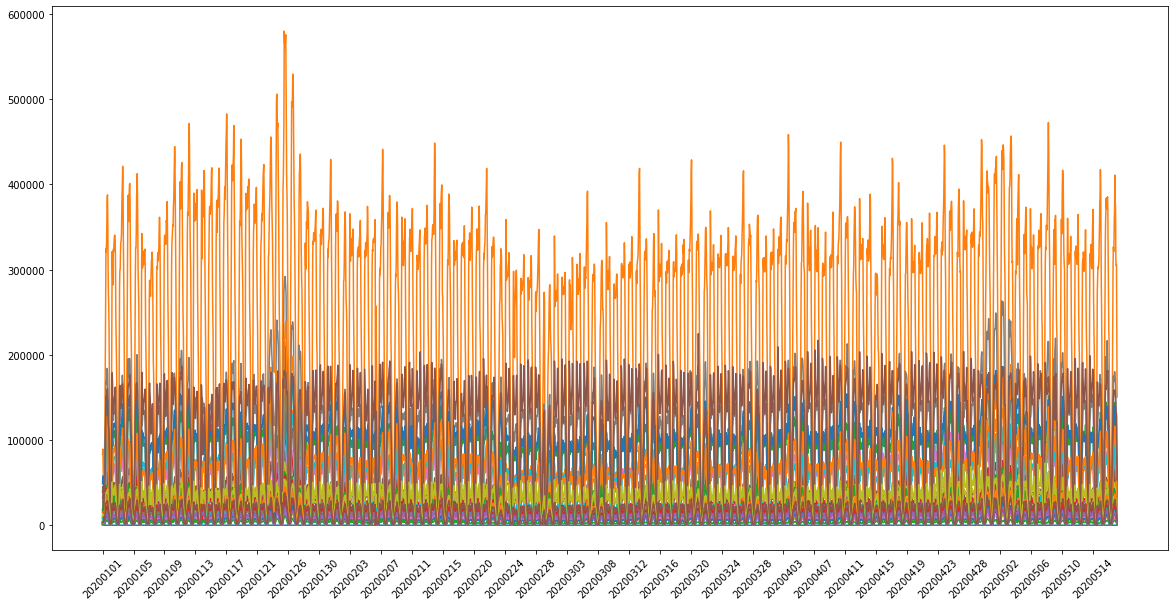

In [25]:


for col in train.columns[1:]:
    plt.plot(train[col])
plt.xticks(x_list, labels=x_labels, rotation=45)


# plt.savefig('savefig_default.png')
plt.show()

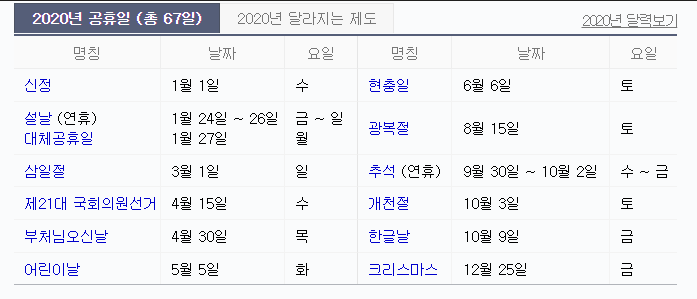

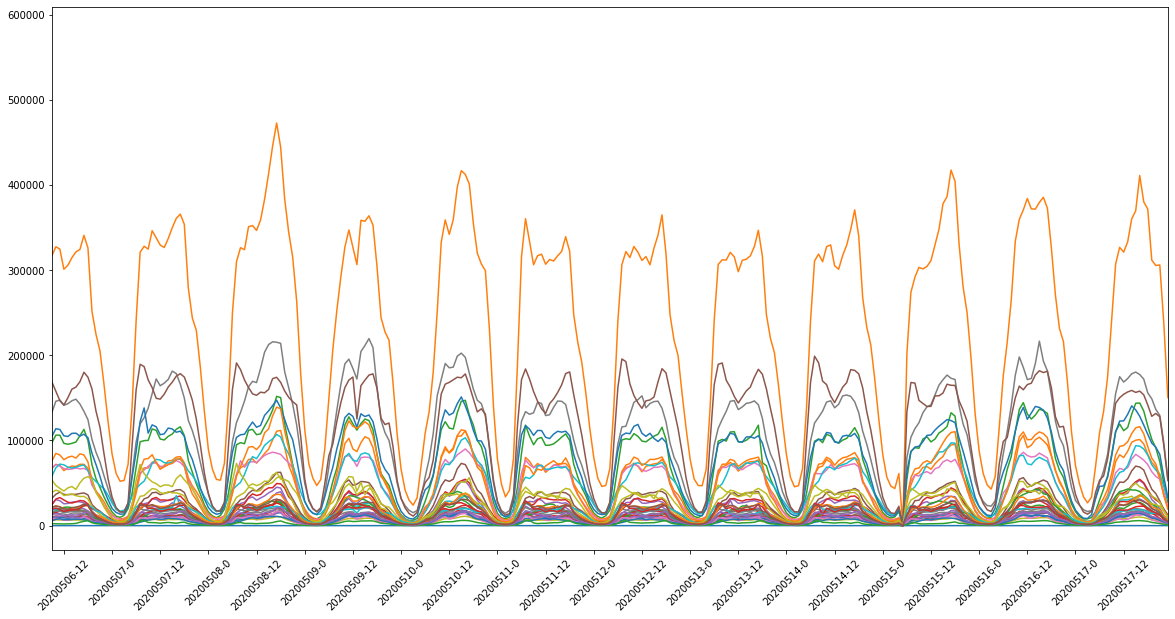

In [38]:
x_list = [x for x in range(2991, 3278, 12)]
x_labels = [f'{train.loc[x]["날짜"]}-{train.loc[x]["시간"]}' for x in x_list]


for col in train.columns[1:]:
    plt.plot(train[col])

plt.xticks(x_list, labels=x_labels, rotation=45)
plt.xlim([3000, 3278])      # X축의 범위: [xmin, xmax]

# plt.savefig('savefig_default.png')
plt.show()

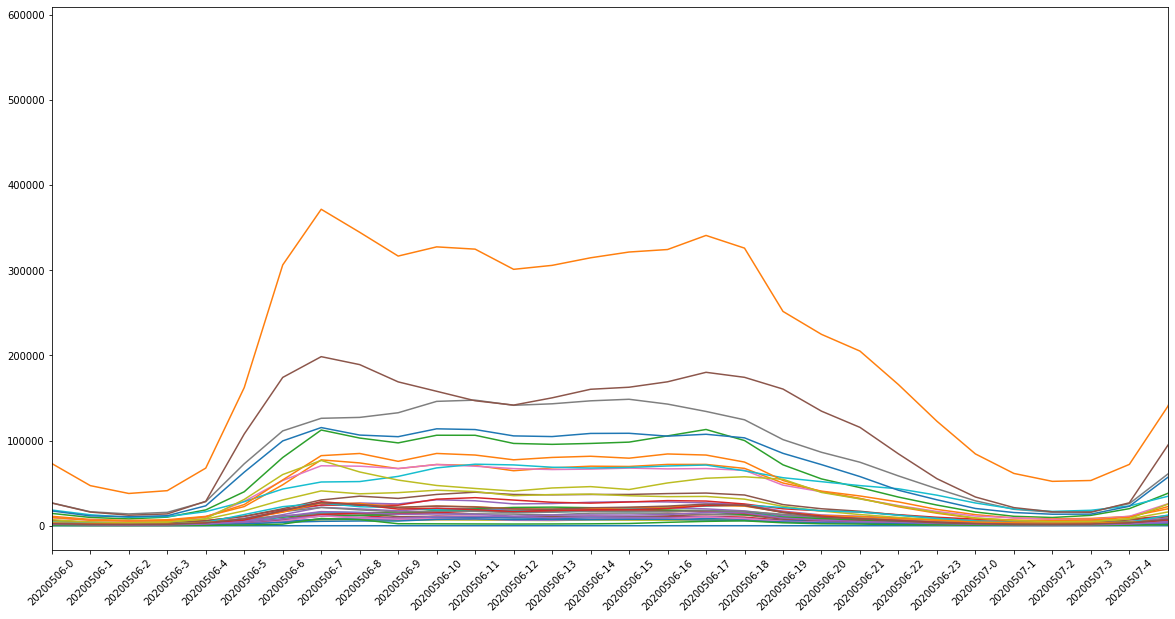

In [40]:
x_list = [x for x in range(2991, 3020, 1)]
x_labels = [f'{train.loc[x]["날짜"]}-{train.loc[x]["시간"]}' for x in x_list]


for col in train.columns[1:]:
    plt.plot(train[col])

plt.xticks(x_list, labels=x_labels, rotation=45)
plt.xlim([2991, 3020])      # X축의 범위: [xmin, xmax]

# plt.savefig('savefig_default.png')
plt.show()

데이터들이 하루마다의 주기성을 보이는 것을 알수있다.



추가적으로 데이터 내의 주기성을 알아보자

In [28]:
fft_list = []
for col in train.columns[1:]:
    fft_list.append(abs(np.fft.fft(train[col])))



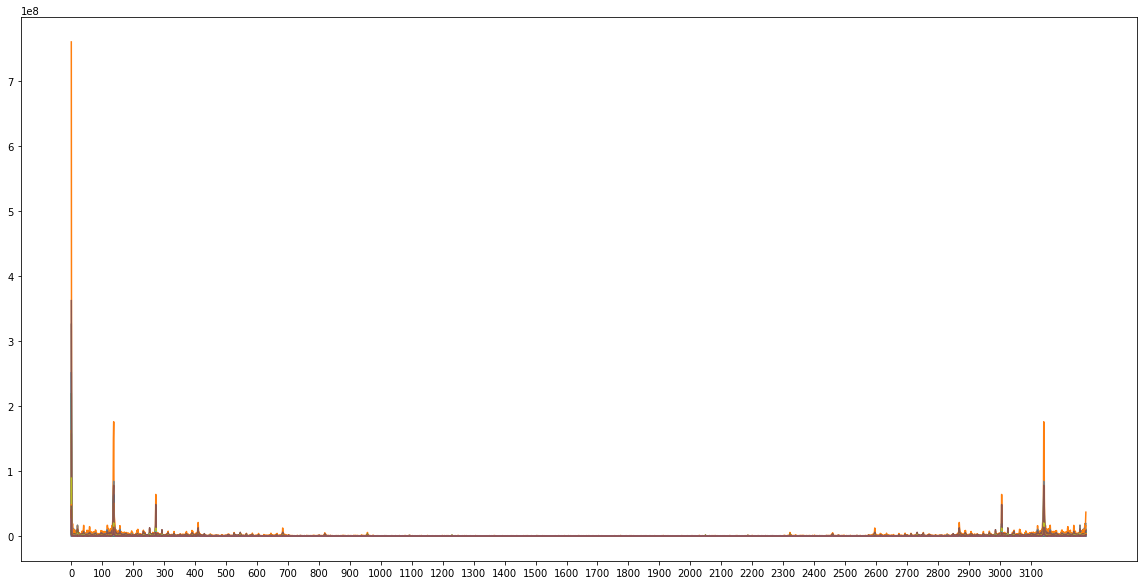

In [29]:
for fft in fft_list:
    plt.plot(fft)
plt.xticks(range(0,3200,100))
plt.show()

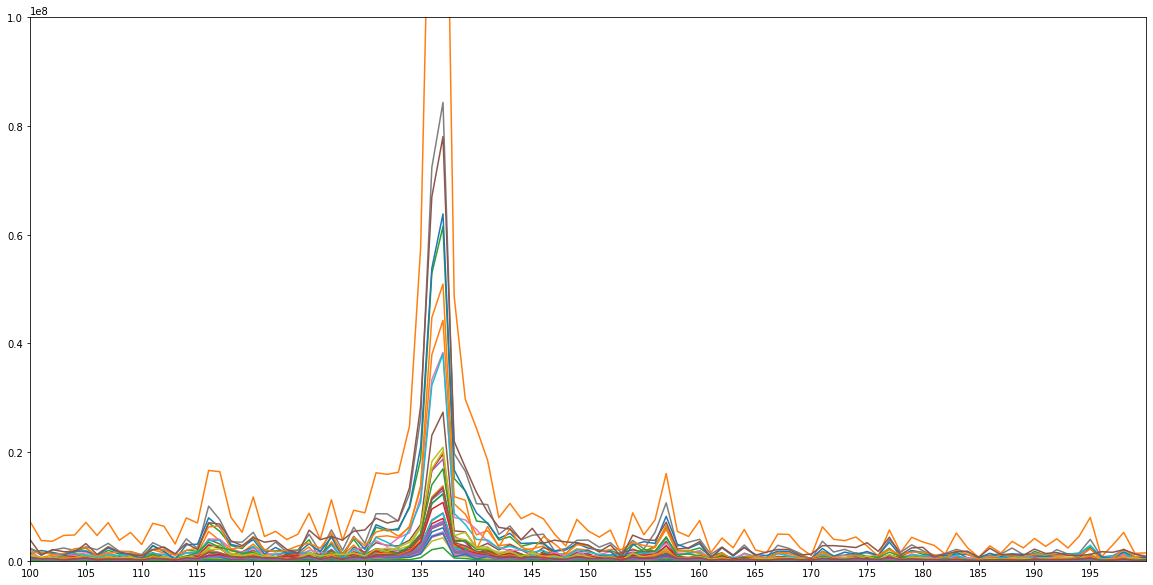

In [31]:
for fft in fft_list:
    plt.plot(fft)
plt.xlim([100, 200])   
plt.ylim([0, 1e8])   
plt.xticks(range(100,200,5))
plt.show()

In [89]:
137/24

5.708333333333333

In [32]:
24*7

168

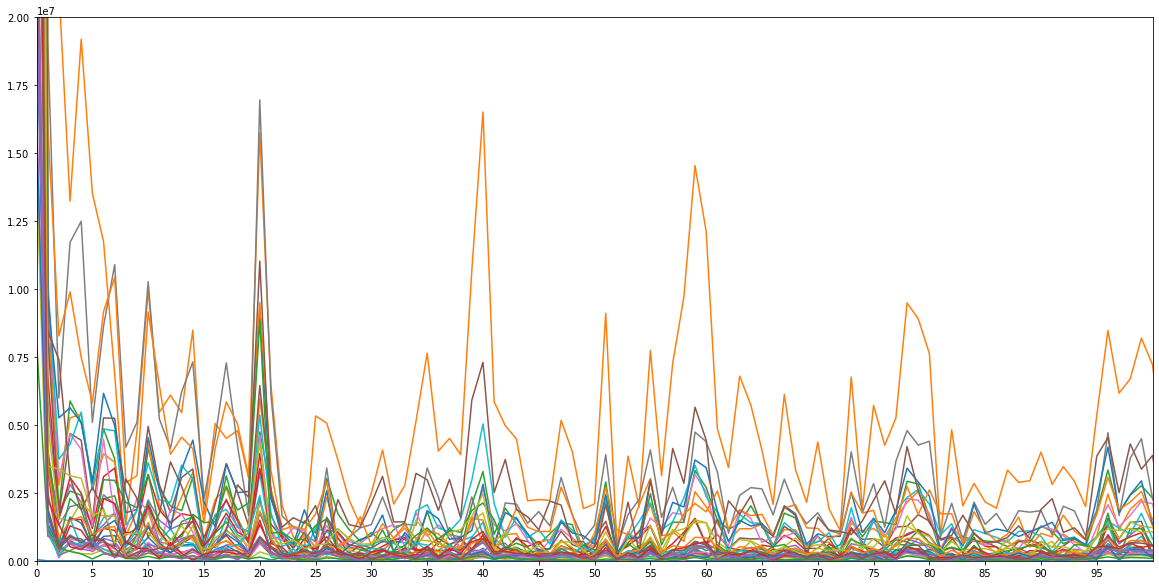

In [36]:
for fft in fft_list:
    plt.plot(fft)
plt.xlim([0, 100])   
plt.ylim([0, 2e7])   
plt.xticks(range(0,100,5))
plt.show()

In [37]:
20/24

0.8333333333333334

public 데이터 분포 확인

In [21]:
sample = pd.read_csv(f'{PATH}/data/sample for pub.csv') # public score 8450

In [22]:
for col in sample.columns[1:]:
    sample.loc[:42, col] = 0


In [23]:
sample.to_csv('prediction.csv', index=False) # public score 32409

In [24]:
sample = pd.read_csv(f'{PATH}/data/sample for pub.csv') # public score 29267
for col in sample.columns[1:]:
    sample.loc[42:84, col] = 0
sample.to_csv('prediction.csv', index=False)

In [25]:
sample = pd.read_csv(f'{PATH}/data/sample for pub.csv') # public score 31789
for col in sample.columns[1:]:
    sample.loc[84:126, col] = 0
sample.to_csv('prediction.csv', index=False)

In [27]:
sample = pd.read_csv(f'{PATH}/data/sample for pub.csv') # public score 37766
for col in sample.columns[1:]:
    sample.loc[126:168, col] = 0
sample.to_csv('prediction.csv', index=False)